In [ ]:
!nvidia-smi -L

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-02-06 18:49:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-02-06 18:49:14 (57.1 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

# Dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-02-06 18:49:20--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.18.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.18.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  1.31MB/s    in 0.4s    

2024-02-06 18:49:21 (1.31 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data("nlp_getting_started.zip")

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df), len(test_df)

(7613, 3263)

# Visualize the samples

In [ ]:
import random
random_index = random.randint(0, len(train_df)-5)

for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real_disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n {text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
 Well me and dad survived my driving ????????

---

Target: 1 (real_disaster)
Text:
 The horrific story of being a hostage - The horrific story of being a hostage It's 1974 and on a British... http://t.co/XcQ48OuRvL

---

Target: 1 (real_disaster)
Text:
 @DavidJordan88 @Stephanenny Except we don't know who started the riot or if it even makes sense to credit any particular individuals...

---

Target: 1 (real_disaster)
Text:
 @AvBronstein @Popehat @instapundit @KurtSchlichter Also are you aware of the casualty estimates for an invasion of Japan's home islands?

---

Target: 0 (not real disaster)
Text:
 @cwheate hahaha I'm half traumatised half hoping my labour is that easy ??

---



### Split train data into train and validation dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

### Text Vectorization (Tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None,
                                    output_mode="int",
                                    output_sequence_length=None,
                                    )

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
sample_sentence = "There's a flood in a my flood street!!!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,   3,  13, 232, 698,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectroized version:\n")
text_vectorizer(random_sentence)

Original text:
 @CVinch_WAOW thank you! Drove by the mayhem. How scary! -Stacy      

Vectroized version:



<tf.Tensor: shape=(15,), dtype=int64, numpy=
array([   1,  449,   12, 3045,   18,    2,  844,   62, 1990, 8148,    0,
          0,    0,    0,    0])>

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Total number of words: {len(words_in_vocab)}\n\
The most 5 common words: {top_5_words}\n\
The least 5 common words: {bottom_5_words}")

Total number of words: 10000
The most 5 common words: ['', '[UNK]', 'the', 'a', 'in']
The least 5 common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


### Creating an Embedding

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             input_length=max_length)

embedding

In [ ]:
random_sentence = random.choice(train_sentences)
print(f"Original text: {random_sentence}\n\
Embedded verson: ")

sample_embedding = embedding(text_vectorizer([random_sentence]))
sample_embedding

Original text: @LondonFire Hi ..Is there an email that people can use to report s'thing they think is a fire hazard/dangerous?
Embedded verson: 


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01046561, -0.02336745, -0.03331243, ..., -0.04951512,
          0.03035099, -0.01283568],
        [-0.01923692, -0.01428676,  0.00909475, ..., -0.02779707,
         -0.02716404,  0.00338272],
        [-0.02449569,  0.02851584, -0.0332123 , ..., -0.00804137,
          0.04552141, -0.04833937],
        ...,
        [-0.04672642,  0.01457028, -0.02042382, ..., -0.0461056 ,
          0.01994521, -0.02621697],
        [ 0.0175981 ,  0.00495627, -0.02334442, ...,  0.02593236,
          0.01725236, -0.02679232],
        [-0.01351142,  0.04297969, -0.04062445, ..., -0.0102887 ,
          0.02932708,  0.04295988]]], dtype=float32)>

In [ ]:
sample_embedding[0][0], random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 0.01046561, -0.02336745, -0.03331243,  0.01449761,  0.0089687 ,
        -0.0027755 ,  0.02962961,  0.03521848,  0.00730592, -0.00445165,
        -0.04632237,  0.02365115, -0.03896321, -0.03219157,  0.02334345,
         0.04685135,  0.04192718, -0.02607008,  0.01460371,  0.00570432,
        -0.00681858,  0.0374291 , -0.03933334,  0.02848751,  0.04568062,
        -0.02427492, -0.04474744,  0.02306141,  0.045568  , -0.04711309,
        -0.01523256,  0.01323067, -0.00819648,  0.04259727,  0.02070801,
         0.00645512,  0.03317585,  0.04686354,  0.01396679, -0.01233356,
        -0.00823434,  0.03720882, -0.0018901 ,  0.0432902 ,  0.04346392,
         0.00434848, -0.04639791, -0.0199888 , -0.03130636,  0.02802754,
        -0.00479915,  0.02548919,  0.00467187, -0.0184369 ,  0.01120988,
        -0.01249435,  0.02424708, -0.01658154, -0.00288433, -0.00380474,
         0.02960333,  0.0322451 , -0.00837656, -0.01053666,  0.02135848,
  

# Modelling Experiments

### Model 0 - Naive Bayes (Baseline)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])

model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score * 100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluation_metrics(y_true, y_pred):
  print(f"Model_0 accuracy is: {accuracy_score(y_true, y_pred)}")
  print(f"Model_0 precision is: {precision_score(y_true, y_pred)}")
  print(f"Model_0 recall is: {recall_score(y_true, y_pred)}")
  print(f"Model_0 f1 score is: {f1_score(y_true, y_pred)}")

In [ ]:
evaluation_metrics(y_true=val_labels, y_pred=baseline_preds)

Model_0 accuracy is: 0.7926509186351706
Model_0 precision is: 0.8861788617886179
Model_0 recall is: 0.6264367816091954
Model_0 f1 score is: 0.734006734006734


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [ ]:
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1 - A simple dense model

In [ ]:
from helper_functions import create_tensorboard_callback

SAVE_DIR = "model_logs"

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20240206-184926
Epoch 1/5
215/215 [==============================] - 11s 41ms/step - loss: 0.6124 - accuracy: 0.6891 - val_loss: 0.5373 - val_accuracy: 0.7559
Epoch 2/5
215/215 [==============================] - 8s 37ms/step - loss: 0.4442 - accuracy: 0.8189 - val_loss: 0.4732 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 8s 37ms/step - loss: 0.3508 - accuracy: 0.8583 - val_loss: 0.4577 - val_accuracy: 0.7927
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.2877 - accuracy: 0.8889 - val_loss: 0.4629 - val_accuracy: 0.7900
Epoch 5/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2413 - accuracy: 0.9094 - val_loss: 0.4743 - val_accuracy: 0.7808


In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4743 - accuracy: 0.7808


[0.4742743968963623, 0.7808399200439453]

In [ ]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs

24/24 [==============================] - 0s 2ms/step


array([[0.41492662],
       [0.75149494],
       [0.9975483 ],
       [0.1136031 ],
       [0.10456464],
       [0.9432771 ],
       [0.9192412 ],
       [0.9928175 ],
       [0.9715804 ],
       [0.22843902],
       [0.13179585],
       [0.6978292 ],
       [0.07196094],
       [0.30656144],
       [0.00598239],
       [0.13804018],
       [0.03636608],
       [0.10408112],
       [0.24000496],
       [0.52563494],
       [0.926871  ],
       [0.03945091],
       [0.46085322],
       [0.08429094],
       [0.95618516],
       [0.9988736 ],
       [0.02803631],
       [0.07218181],
       [0.03457759],
       [0.22211498],
       [0.55172443],
       [0.23947307],
       [0.5563186 ],
       [0.20488022],
       [0.5565486 ],
       [0.0637093 ],
       [0.9938181 ],
       [0.12341095],
       [0.03847218],
       [0.9982838 ],
       [0.17250925],
       [0.02540937],
       [0.3283455 ],
       [0.07345591],
       [0.656743  ],
       [0.9844888 ],
       [0.31695485],
       [0.931

In [ ]:
model_1_pred_probs.shape

(762, 1)

In [ ]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'accuracy': 78.08398950131233,
 'precision': 0.7841274438015813,
 'recall': 0.7808398950131233,
 'f1': 0.7782630349987989}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [ ]:
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [ ]:
embed_weights = model_1.get_layer("embedding").get_weights()
embed_weights

[array([[-0.05453901, -0.04510373,  0.06000714, ..., -0.0116443 ,
         -0.03315338, -0.02817935],
        [ 0.0277533 , -0.03570383, -0.04525596, ..., -0.02105767,
         -0.05073579,  0.04899146],
        [-0.01708184, -0.05980892, -0.03423193, ...,  0.01118911,
          0.01809158, -0.05108773],
        ...,
        [ 0.00692475,  0.01155714,  0.02270576, ...,  0.04441592,
          0.03626749,  0.0499639 ],
        [-0.04441765, -0.0277336 , -0.01035885, ..., -0.00709377,
          0.06543218, -0.05067332],
        [-0.08225812, -0.02095395,  0.11338945, ..., -0.10631961,
          0.07791158, -0.07409272]], dtype=float32)]

In [ ]:
words_in_vocab[:5]

['', '[UNK]', 'the', 'a', 'in']

In [ ]:
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue
    vec = embed_weights[index]
    out_v.write('\t'.join([str(x) for x in vec]) + "\n")
    out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
try:
   from google.colab import files
except ImportError:
   pass
else:
   files.download("vectors.tsv")
   files.download("metadata.tsv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model 2 - LSTM

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
#x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")

In [ ]:
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              )

Epoch 1/5
215/215 [==============================] - 11s 38ms/step - loss: 0.2204 - accuracy: 0.9219 - val_loss: 0.5497 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 7s 30ms/step - loss: 0.1563 - accuracy: 0.9407 - val_loss: 0.6019 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 8s 35ms/step - loss: 0.1269 - accuracy: 0.9536 - val_loss: 0.8372 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 8s 35ms/step - loss: 0.1019 - accuracy: 0.9618 - val_loss: 0.7690 - val_accuracy: 0.7822
Epoch 5/5
215/215 [==============================] - 7s 32ms/step - loss: 0.0811 - accuracy: 0.9667 - val_loss: 1.0106 - val_accuracy: 0.7756


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[4.7734305e-03],
       [8.6486238e-01],
       [9.9983937e-01],
       [8.4791757e-02],
       [3.0504979e-04],
       [9.9902636e-01],
       [9.8507792e-01],
       [9.9988467e-01],
       [9.9975002e-01],
       [5.6966531e-01]], dtype=float32)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.55905511811024,
 'precision': 0.776326889347514,
 'recall': 0.7755905511811023,
 'f1': 0.7740902496040959}

### Model 3 - GRU RNN

In [ ]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              )

Epoch 1/5
215/215 [==============================] - 9s 32ms/step - loss: 0.1576 - accuracy: 0.9371 - val_loss: 0.7359 - val_accuracy: 0.7769
Epoch 2/5
215/215 [==============================] - 11s 52ms/step - loss: 0.0822 - accuracy: 0.9704 - val_loss: 0.9005 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 13s 60ms/step - loss: 0.0690 - accuracy: 0.9720 - val_loss: 0.9919 - val_accuracy: 0.7769
Epoch 4/5
215/215 [==============================] - 11s 53ms/step - loss: 0.0571 - accuracy: 0.9764 - val_loss: 1.0235 - val_accuracy: 0.7848
Epoch 5/5
215/215 [==============================] - 14s 67ms/step - loss: 0.0494 - accuracy: 0.9784 - val_loss: 1.1131 - val_accuracy: 0.7756


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[1.3461552e-03],
       [8.0303991e-01],
       [9.9981588e-01],
       [1.8165328e-01],
       [9.2649418e-05],
       [9.9930465e-01],
       [9.5771146e-01],
       [9.9991566e-01],
       [9.9974620e-01],
       [7.3171628e-01]], dtype=float32)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.55905511811024,
 'precision': 0.7780461459912817,
 'recall': 0.7755905511811023,
 'f1': 0.7732287214395843}

### Experimental model

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
experimental_model = tf.keras.Model(inputs, outputs, name="experimental_model_LSTM_GRU")

In [ ]:
experimental_model.compile(loss="binary_crossentropy",
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

In [ ]:
experimental_model_history = experimental_model.fit(train_sentences,
                                                    train_labels,
                                                    epochs=5,
                                                    validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 25s 59ms/step - loss: 0.1128 - accuracy: 0.9539 - val_loss: 0.9250 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 11s 51ms/step - loss: 0.0571 - accuracy: 0.9768 - val_loss: 1.2240 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 11s 51ms/step - loss: 0.0494 - accuracy: 0.9781 - val_loss: 1.1443 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 11s 51ms/step - loss: 0.0450 - accuracy: 0.9785 - val_loss: 1.4554 - val_accuracy: 0.7717
Epoch 5/5
215/215 [==============================] - 11s 52ms/step - loss: 0.0419 - accuracy: 0.9806 - val_loss: 1.6443 - val_accuracy: 0.7677


In [ ]:
experimental_pred_probs = experimental_model.predict(val_sentences)
experimental_pred_probs[:10]

24/24 [==============================] - 1s 10ms/step


array([[2.4505713e-04],
       [8.6446196e-01],
       [9.9996859e-01],
       [9.5083579e-02],
       [2.9276311e-05],
       [9.9982291e-01],
       [9.9512994e-01],
       [9.9995476e-01],
       [9.9994487e-01],
       [9.9943000e-01]], dtype=float32)

In [ ]:
experimental_preds = tf.squeeze(tf.round(experimental_pred_probs))
experimental_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
experimental_results = calculate_results(y_true=val_labels,
                                         y_pred=experimental_preds)
experimental_results

{'accuracy': 76.77165354330708,
 'precision': 0.7683074753719822,
 'recall': 0.7677165354330708,
 'f1': 0.7661635916954678}

### Model 4 - Bidirectional RNN

In [ ]:
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layer=layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 128)               98816     
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1378945 (5.26 MB)
Trainable par

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 14s 45ms/step - loss: 0.0987 - accuracy: 0.9701 - val_loss: 1.0440 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 11s 50ms/step - loss: 0.0419 - accuracy: 0.9807 - val_loss: 1.2306 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 9s 43ms/step - loss: 0.0422 - accuracy: 0.9813 - val_loss: 1.1613 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 8s 39ms/step - loss: 0.0381 - accuracy: 0.9801 - val_loss: 1.4991 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 9s 41ms/step - loss: 0.0390 - accuracy: 0.9812 - val_loss: 1.4097 - val_accuracy: 0.7638


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[6.37037028e-03],
       [8.21056783e-01],
       [9.99974549e-01],
       [1.20953485e-01],
       [5.88261282e-05],
       [9.99914408e-01],
       [9.93130207e-01],
       [9.99991238e-01],
       [9.99977231e-01],
       [9.74256575e-01]], dtype=float32)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds)
model_4_results

{'accuracy': 76.37795275590551,
 'precision': 0.7652161443395734,
 'recall': 0.7637795275590551,
 'f1': 0.7616372852178903}

### Model 5 - 1D CNN

In [ ]:
from tensorflow.keras import layers

In [ ]:
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
print(x.shape)
x = embedding(x)
print(x.shape)
x = layers.Conv1D(64, 3, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_1D_CNN")

(None, 15)
(None, 15, 128)
(None, 64)


In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
train_labels.shape

(6851,)

In [ ]:
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 7s 26ms/step - loss: 0.1684 - accuracy: 0.9533 - val_loss: 0.8115 - val_accuracy: 0.7664
Epoch 2/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0832 - accuracy: 0.9689 - val_loss: 0.9853 - val_accuracy: 0.7625
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0679 - accuracy: 0.9737 - val_loss: 1.1153 - val_accuracy: 0.7546
Epoch 4/5
215/215 [==============================] - 5s 22ms/step - loss: 0.0574 - accuracy: 0.9761 - val_loss: 1.2457 - val_accuracy: 0.7585
Epoch 5/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0529 - accuracy: 0.9781 - val_loss: 1.3298 - val_accuracy: 0.7572


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[6.9933426e-01],
       [8.3755046e-01],
       [9.9999660e-01],
       [5.5923782e-02],
       [1.7195457e-07],
       [9.9703777e-01],
       [9.9919444e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.1701865e-01]], dtype=float32)

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.7217847769029,
 'precision': 0.757104469267424,
 'recall': 0.7572178477690289,
 'f1': 0.7560477242612443}

### Model 6 - TensroFlow Hub Pretrained Sentence Encoder

In [ ]:
import tensorflow_hub as hub

In [ ]:
# Create a Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation="relu"),
    layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_6_USE")

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 256863617 (979.86 MB)
Trainable params: 65793 (257.00 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 6s 16ms/step - loss: 0.4860 - accuracy: 0.7894 - val_loss: 0.4596 - val_accuracy: 0.7992
Epoch 2/5
215/215 [==============================] - 4s 18ms/step - loss: 0.4113 - accuracy: 0.8187 - val_loss: 0.4401 - val_accuracy: 0.8110
Epoch 3/5
215/215 [==============================] - 3s 13ms/step - loss: 0.3954 - accuracy: 0.8228 - val_loss: 0.4315 - val_accuracy: 0.8058
Epoch 4/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3850 - accuracy: 0.8307 - val_loss: 0.4232 - val_accuracy: 0.8163
Epoch 5/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3731 - accuracy: 0.8374 - val_loss: 0.4220 - val_accuracy: 0.8150


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 17ms/step


array([[0.13867879],
       [0.7392665 ],
       [0.99235016],
       [0.19658224],
       [0.7424323 ],
       [0.7320628 ],
       [0.9818955 ],
       [0.9831422 ],
       [0.95462954],
       [0.09718512]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8179063565195398,
 'recall': 0.8149606299212598,
 'f1': 0.8132300658103407}

### Model 7 - TF Hub Pretrained USE with 10% of data

In [ ]:
#train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
#train_sentences_10_percent = train_10_percent["text"].to_list()
#train_labels_10_percent = train_10_percent["target"].to_list()
#len(train_sentences_10_percent), len(train_labels_10_percent)

In [ ]:
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
pd.Series(np.array(train_labels)).value_counts()

0    3928
1    2923
dtype: int64

In [ ]:
pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [ ]:
from tensorflow.keras import layers

model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_7_USE_10_percent_data")

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_7.summary()

Model: "model_7_USE_10_percent_data"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 2s 48ms/step - loss: 0.6678 - accuracy: 0.6336 - val_loss: 0.6523 - val_accuracy: 0.6522
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.6014 - accuracy: 0.7781 - val_loss: 0.6005 - val_accuracy: 0.7507
Epoch 3/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5288 - accuracy: 0.8161 - val_loss: 0.5494 - val_accuracy: 0.7782
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4684 - accuracy: 0.8248 - val_loss: 0.5131 - val_accuracy: 0.7756
Epoch 5/5
22/22 [==============================] - 1s 23ms/step - loss: 0.4245 - accuracy: 0.8350 - val_loss: 0.4965 - val_accuracy: 0.7808


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 14ms/step


array([[0.19607666],
       [0.57869375],
       [0.87643087],
       [0.37143686],
       [0.5469835 ],
       [0.65459794],
       [0.84428394],
       [0.7827718 ],
       [0.82425874],
       [0.1421493 ]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 78.08398950131233,
 'precision': 0.7834583238190046,
 'recall': 0.7808398950131233,
 'f1': 0.778533312750939}

In [ ]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8179063565195398,
 'recall': 0.8149606299212598,
 'f1': 0.8132300658103407}

In [ ]:
model_all_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use": model_6_results,
                                  "7_tf_hub_use_10_percent": model_7_results
                                  })

model_all_results = model_all_results.transpose()
model_all_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.083990,0.784127,0.780840,0.778263
2_lstm,77.559055,0.776327,0.775591,0.774090
3_gru,77.559055,0.778046,0.775591,0.773229
4_bidirectional,76.377953,0.765216,0.763780,0.761637
5_conv1d,75.721785,0.757104,0.757218,0.756048
6_tf_hub_use,81.496063,0.817906,0.814961,0.813230
7_tf_hub_use_10_percent,78.083990,0.783458,0.780840,0.778533


In [ ]:
model_all_results["accuracy"] = model_all_results["accuracy"] / 100.
model_all_results

,accuracy,precision,recall,f1
0_baseline,0.792651,0.811139,0.792651,0.786219
1_simple_dense,0.780840,0.784127,0.780840,0.778263
2_lstm,0.775591,0.776327,0.775591,0.774090
3_gru,0.775591,0.778046,0.775591,0.773229
4_bidirectional,0.763780,0.765216,0.763780,0.761637
5_conv1d,0.757218,0.757104,0.757218,0.756048
6_tf_hub_use,0.814961,0.817906,0.814961,0.813230
7_tf_hub_use_10_percent,0.780840,0.783458,0.780840,0.778533


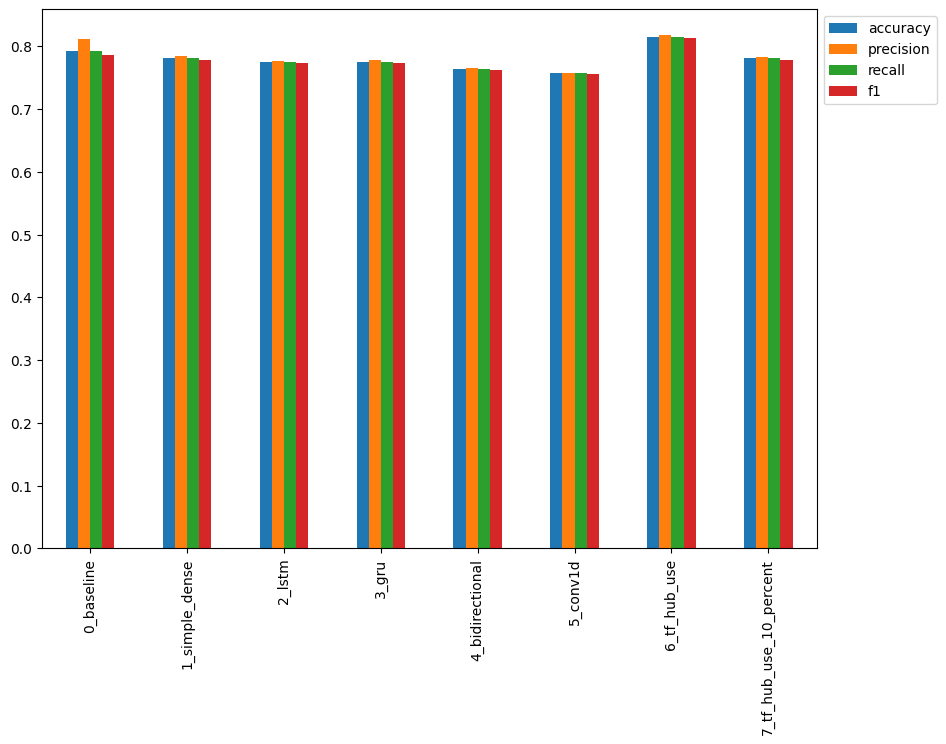

In [ ]:
model_all_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

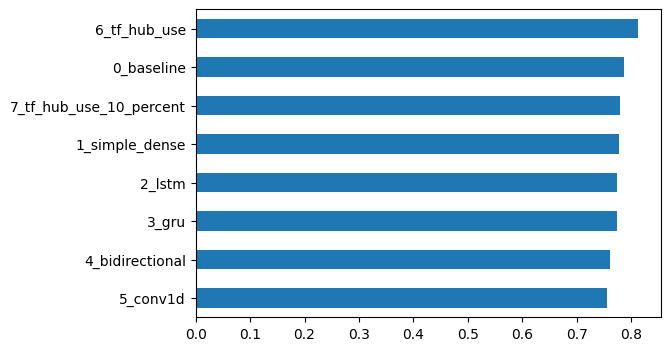

In [ ]:
model_all_results.sort_values("f1", ascending=True)["f1"].plot(kind="barh", figsize=(6, 4));

In [ ]:
model_6.save("model_6.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model("model_6.h5",
                                            custom_objects={"KerasLayer": hub.KerasLayer})

In [ ]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4220 - accuracy: 0.8150


[0.42199239134788513, 0.8149606585502625]

In [ ]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8179063565195398,
 'recall': 0.8149606299212598,
 'f1': 0.8132300658103407}

In [ ]:
model_6.save("model_6_SavedModel_format")

In [ ]:
loaded_model_6_SavedModel_format = tf.keras.models.load_model("/content/model_6_SavedModel_format")

In [ ]:
loaded_model_6_SavedModel_format.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 12ms/step - loss: 0.4220 - accuracy: 0.8150


[0.42199239134788513, 0.8149606585502625]

In [ ]:
model_6_results

{'accuracy': 81.49606299212599,
 'precision': 0.8179063565195398,
 'recall': 0.8149606299212598,
 'f1': 0.8132300658103407}

# Download pretrained model

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip

--2024-02-06 18:56:32--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.207, 108.177.96.207, 108.177.119.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  38.5MB/s    in 25s     

2024-02-06 18:56:58 (36.4 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]



In [ ]:
!unzip 08_model_6_USE_feature_extractor.zip

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.index  
  inflating: 08_model_6_USE_feature_extractor/saved_model.pb  


In [ ]:
model_6_pretrained = tf.keras.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 11ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10]

24/24 [==============================] - 1s 11ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong[-10:]

,text,target,pred,pred_prob
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.067303
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.055076
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.054603
221,going to redo my nails and watch behind the sc...,1,0.0,0.054597
59,You can never escape me. Bullets don't harm me...,1,0.0,0.049637
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
#False Positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Pred_prob: {pred_prob}")
  print(f"Text: \n{text}\n")
  print("----\n")

Target: 0, Pred: 1.0, Pred_prob: 0.9101957082748413
Text: 
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

Target: 0, Pred: 1.0, Pred_prob: 0.8769820332527161
Text: 
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

Target: 0, Pred: 1.0, Pred_prob: 0.8523001670837402
Text: 
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

Target: 0, Pred: 1.0, Pred_prob: 0.8354544043540955
Text: 
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

Target: 0, Pred: 1.0, Pred_prob: 0.8272131681442261
Text: 
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

Target: 0, Pred: 1.0, Pred_prob: 0.814815878868103
Text: 
@SonofLiberty357 all illuminated by the brightly burning 

In [ ]:
# False Negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Pred_prob: {pred_prob}")
  print(f"Text: \n{text}\n")
  print("----\n")

Target: 1, Pred: 0.0, Pred_prob: 0.06730345636606216
Text: 
@DavidVonderhaar At least you were sincere ??

----

Target: 1, Pred: 0.0, Pred_prob: 0.055075839161872864
Text: 
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

Target: 1, Pred: 0.0, Pred_prob: 0.054603397846221924
Text: 
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

Target: 1, Pred: 0.0, Pred_prob: 0.05459701269865036
Text: 
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

Target: 1, Pred: 0.0, Pred_prob: 0.04963730648159981
Text: 
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

Target: 1, Pred: 0.0, Pred_prob: 0.04391849413514137
Text: 
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren



In [ ]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")

1/1 [==============================] - 0s 142ms/step
Pred: 1, Prob: 0.5562381744384766
Text:
I have stopped trying to figure out if THIS will be the misogyny/racism/religion-fueled shooting that will incite rioting.

-----

1/1 [==============================] - 0s 106ms/step
Pred: 0, Prob: 0.16429860889911652
Text:
Police siren sound effect 1 via Play Tube Fre http://t.co/BLWnTMyQmQ

-----

1/1 [==============================] - 0s 83ms/step
Pred: 1, Prob: 0.7644195556640625
Text:
General News Û¢åÊ'Demolition of houses on waterways begins at Achimota Mile 7 ' via @233liveOnline. Full story at http://t.co/iO7kUUg1uq

-----

1/1 [==============================] - 0s 82ms/step
Pred: 0, Prob: 0.1063413918018341
Text:
Yes. He said its dropping soon '@SDotJR_: NO WAYS!!! A video for 'Stretcher'?! @Ofentse_Tsie'

-----

1/1 [==============================] - 0s 76ms/step
Pred: 1, Prob: 0.939666748046875
Text:
Large sinkhole swallows entire pond in Lowndes County Georgia http://t.co/20Gi4Gyu

In [ ]:
tweet = "When the derailment happen, many people die"

In [ ]:
sample_pred_prob = model_6_pretrained.predict([tweet])
sample_preds = tf.squeeze(tf.round(sample_pred_prob))
sample_pred_prob, sample_preds

1/1 [==============================] - 0s 95ms/step


(array([[0.9400024]], dtype=float32),
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [ ]:
import time
def pred_timer(model, samples):
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained, samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 1s 23ms/step


(0.8150177399998029, 0.0010695770866139145)

In [ ]:
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model=model_0, samples=val_sentences)
baseline_total_pred_time, baseline_time_per_pred

(0.1307912170000236, 0.00017164201706039843)

In [ ]:
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

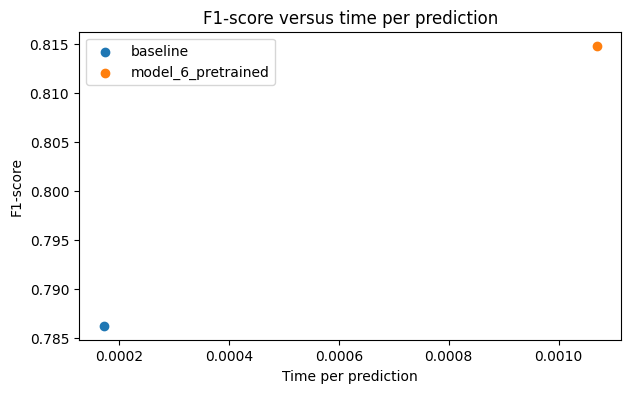

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="model_6_pretrained")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");